## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from Funtion_model import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Train the model

In [3]:
X = data1.drop('fetal_health', axis =1)
y = data1['fetal_health']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 14), (423, 14), (1690,), (423,))

In [6]:
y_train.value_counts()

A    1305
B     238
C     147
Name: fetal_health, dtype: int64

## Scaling the imbalanced data: SMOTE
Scaling the imbalanced data of Training set only

In [7]:
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

C    1305
B    1305
A    1305
Name: fetal_health, dtype: int64

In [8]:
X_train_sm

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
0,76.829840,-1.833548,-3.904537,-1.363542,-1.677820,21.615679,-1.698371,7.498550,-0.229605,13.413574,1.339612,2.228554,53149.942412,1.424686
1,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,15.637316,-1.698371,2.072439,-0.229605,9.456557,1.339612,0.000000,53149.942412,1.122632
2,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,18.683316,-1.698371,5.280009,-0.229605,15.146484,1.339612,0.752864,53149.942412,1.424686
3,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.305597,-1.698371,0.842500,-0.229605,10.958094,1.339612,0.752864,53149.942412,0.702658
4,83.021340,-1.833548,-3.904537,-1.363542,-1.654421,33.422585,-1.698371,7.498550,-0.746032,23.892121,1.339612,2.877034,53149.942412,4.318061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,66.333870,-1.833548,-3.904537,-1.363542,-1.652287,35.142541,-1.698371,7.498550,-0.229605,22.534643,1.339612,2.483044,53149.942412,3.987993
3911,78.384675,-1.833548,-3.904537,-1.363542,-1.720657,31.680821,-1.698371,7.498550,-0.229605,20.029582,1.339612,2.348743,53149.942412,4.361523
3912,78.384675,-1.833548,-3.904537,-1.363542,-1.696210,31.680821,-1.698371,7.498550,-0.229605,20.029582,1.339612,1.972143,53149.942412,4.101018
3913,87.109619,-1.833548,-3.904537,-1.363542,-1.677820,41.094869,-1.698371,7.498550,-0.229605,5.234095,1.339612,1.738371,53149.942412,0.328081


In [9]:
X_test

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
596,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,38.522975,-1.698371,7.498550,-0.229605,13.564670,1.339612,0.752864,53149.942412,1.661337
1992,74.227625,-1.833548,-3.904537,-1.363542,-1.638326,31.680821,-1.698371,7.498550,-0.229605,19.021333,1.339612,2.228554,53149.942412,3.781944
422,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,22.571797,-1.698371,7.498550,-0.229605,18.205688,1.339612,1.956520,53149.942412,2.294709
289,83.021340,-1.833548,-3.904537,-1.363542,-1.677820,32.118398,-1.698371,7.498550,-0.229605,16.985604,1.339612,3.376131,53149.942412,1.122632
196,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.763105,-1.698371,1.505040,-0.229605,8.845061,1.339612,1.738371,53149.942412,1.122632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,79.418603,-1.833548,-3.904537,-1.363542,-1.677820,32.989253,-1.698371,3.867991,-0.229605,10.039637,1.339612,0.000000,53149.942412,0.000000
561,75.790601,-1.833548,-3.904537,-1.363542,-1.672667,23.988171,-1.698371,7.498550,-0.229605,24.454952,1.339612,3.221597,53149.942412,3.233810
438,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,32.118398,-1.698371,3.867991,-0.229605,6.262482,1.339612,1.738371,53149.942412,3.219352
433,87.618558,-1.833548,-3.904537,-1.363542,-1.682980,30.359136,-1.698371,6.489261,-0.229605,24.454952,1.339612,3.376131,53149.942412,4.360620


## Scaling with standardization

In [10]:
transformer = StandardScaler().fit(X_train_sm)
x_standardized = transformer.transform(X_train_sm)

In [11]:
transformer = StandardScaler().fit(X_test)
x_standardized = transformer.transform(X_test)

In [12]:
X_train_sm.shape, X_test.shape

((3915, 14), (423, 14))

## Model evaluation 
+ Here we will test on Logistic Regression, KNN and Random Forest
+ Using functions from .py file
### Logistic regression

1) Logistic regression score: 0.6737588652482269
2) Confustion metrix:
[[229  49  63]
 [  5  37  12]
 [  3   6  19]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.97      0.67      0.79       341
           B       0.40      0.69      0.51        54
           C       0.20      0.68      0.31        28

    accuracy                           0.67       423
   macro avg       0.52      0.68      0.54       423
weighted avg       0.84      0.67      0.72       423



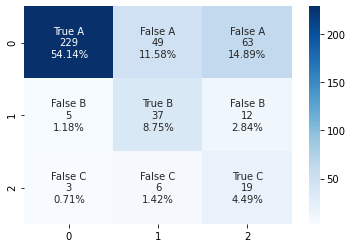

In [13]:
logistic_regression(X_train_sm, y_train_sm, X_test, y_test)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [14]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8936170212765957,
 0.851063829787234,
 0.8297872340425532,
 0.817966903073286,
 0.8085106382978723,
 0.8132387706855791,
 0.8014184397163121,
 0.7990543735224587,
 0.7990543735224587,
 0.7848699763593381]

Text(0, 0.5, 'Accuracy')

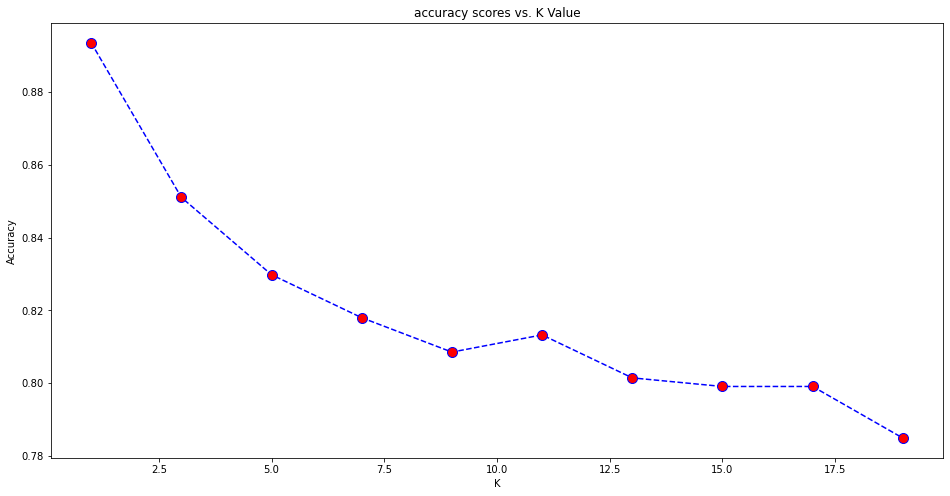

In [15]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Apply into KNN model
Use funtion from .py file

In [16]:
knn_classifier(X_train_sm, y_train_sm, X_test, y_test, 10)

1) KNN Classifier accuracy score:
0.8274231678486997
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.97      0.83      0.89       341
           B       0.48      0.80      0.60        54
           C       0.57      0.82      0.68        28

    accuracy                           0.83       423
   macro avg       0.67      0.82      0.72       423
weighted avg       0.88      0.83      0.84       423



### Random Forest
Using funtion from .py file

### Check accuracy score with defaulted parameters

In [17]:
random_forest(X_train_sm, y_train_sm, X_test, y_test)

1) Random forest accuracy score: 0.8557919621749409


### Hyperparameter selection with Gridsearch

In [18]:
# number of trees in random forest model building
n_estimators = [50, 100, 150, 200, 500, 1000]
# number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# max number of level in the trees
max_depth = [2,4,6,8,10]
# min number of samples required to split the node
min_samples_split = [2,4]
# min number of samples 
min_samples_leaf = [1, 2]


# create the parameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
    }

# find the best params for random forest! 
clf = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train_sm,y_train_sm)
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [20]:
random_forest_param_test(X_train_sm, y_train_sm, 'auto', 1, 2, 10, 500)

0.9277245680881048
